# **Installing rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-05-15 01:44:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   196MB/s    in 0.4s    

2021-05-15 01:44:33 (196 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# **Load and Read the dataset**

In [ ]:
import pandas as pd

In [ ]:
import io
from google.colab import files

f = files.upload()

Saving normalized.csv to normalized (1).csv


In [ ]:
cdata = pd.read_csv(io.BytesIO(f["normalized.csv"]))
cdata

,InChI Key,SMILES,Solubility
0,XLMALTXPSGQGBX-GCJKJVERSA-N,CCC(=O)OC(CC1=CC=CC=C1)(C2=CC=CC=C2)C(C)CN(C)C,0.605477
1,CUIHSIWYWATEQL-UHFFFAOYSA-N,CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=...,0.381279
2,RUDATBOHQWOJDD-BSWAIDMHSA-N,CC(CCC(=O)O)C1CCC2C1(CCC3C2C(CC4C3(CCC(C4)O)C)O)C,0.622929
3,QNZCBYKSOIHPEH-UHFFFAOYSA-N,COC1=CC=C(C=C1)N2C3=C(CCN(C3=O)C4=CC=C(C=C4)N5...,0.140120
4,PTOIAAWZLUQTIO-GXFFZTMASA-N,CCC(=O)NCC1CC1C2=C3CCOC3=CC=C2,0.698748
...,...,...,...
1236,UYUXSRADSPPKRZ-SKNVOMKLSA-N,C(=O)C(C1C(C(C(=O)O1)O)O)O,0.594771
1237,SNICXCGAKADSCV-UHFFFAOYSA-N,CN1CCCC1C2=CN=CC=C2,0.680657
1238,UIDWQGRXEVDFCA-XCVCLJGOSA-N,C1C(=O)N(C(=O)N1N=CC2=CC=C(O2)[N+](=O)[O-])CO,0.635164
1239,ISWSIDIOOBJBQZ-UHFFFAOYSA-N,C1=CC=C(C=C1)O,0.869450


In [ ]:
data = cdata

In [ ]:
data.SMILES 

0          CCC(=O)OC(CC1=CC=CC=C1)(C2=CC=CC=C2)C(C)CN(C)C
1       CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=...
2       CC(CCC(=O)O)C1CCC2C1(CCC3C2C(CC4C3(CCC(C4)O)C)O)C
3       COC1=CC=C(C=C1)N2C3=C(CCN(C3=O)C4=CC=C(C=C4)N5...
4                          CCC(=O)NCC1CC1C2=C3CCOC3=CC=C2
                              ...                        
1236                           C(=O)C(C1C(C(C(=O)O1)O)O)O
1237                                  CN1CCCC1C2=CN=CC=C2
1238        C1C(=O)N(C(=O)N1N=CC2=CC=C(O2)[N+](=O)[O-])CO
1239                                       C1=CC=C(C=C1)O
1240                                 C1=CC=C(C=C1)CC(=O)O
Name: SMILES, Length: 1241, dtype: object

In [ ]:
data.Solubility

0       0.605477
1       0.381279
2       0.622929
3       0.140120
4       0.698748
          ...   
1236    0.594771
1237    0.680657
1238    0.635164
1239    0.869450
1240    0.699907
Name: Solubility, Length: 1241, dtype: float64

# **Convert list of molecules to rdkit object**

In [ ]:
from rdkit import Chem

In [ ]:
mol_list= []
for element in data.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [ ]:
len(mol_list)

1241

# **Calculate molecular descriptors**


1.   cLogP (Octanol-water partition coefficient)
2.   MW (Molecular weight)
3.   RB (Number of rotatable bonds)
4.   AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)




In [ ]:
import numpy as np
from rdkit.Chem import Descriptors

In [ ]:
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df = generate(cdata.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,4.27550,339.479,8.0
1,3.13904,437.529,5.0
2,4.47790,392.580,4.0
3,2.69960,459.506,5.0
4,2.25120,245.322,4.0
...,...,...,...
1236,-2.80660,176.124,2.0
1237,1.84830,162.236,1.0
1238,-0.26430,268.185,4.0
1239,1.39220,94.113,0.0


# **Number of Aromatic Atoms**

In [ ]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  # aa_count = []
  # for i in aromatic_atoms:
  #   if i==True:
  #     aa_count.append(1)
  sum_aa_count = sum(aromatic_atoms)
  return sum_aa_count

In [ ]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[12,
 21,
 0,
 17,
 6,
 18,
 11,
 6,
 0,
 24,
 15,
 12,
 0,
 10,
 15,
 18,
 6,
 0,
 15,
 12,
 10,
 6,
 12,
 0,
 0,
 0,
 21,
 0,
 12,
 9,
 0,
 15,
 6,
 11,
 12,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 12,
 5,
 17,
 12,
 0,
 15,
 9,
 18,
 5,
 16,
 12,
 6,
 0,
 0,
 16,
 12,
 0,
 0,
 12,
 15,
 18,
 9,
 12,
 9,
 9,
 6,
 16,
 10,
 12,
 5,
 9,
 9,
 15,
 15,
 9,
 12,
 6,
 9,
 17,
 26,
 21,
 23,
 6,
 10,
 10,
 21,
 0,
 0,
 12,
 16,
 12,
 0,
 18,
 6,
 10,
 30,
 18,
 6,
 0,
 29,
 0,
 0,
 10,
 6,
 12,
 18,
 15,
 10,
 12,
 10,
 16,
 22,
 0,
 10,
 6,
 6,
 16,
 6,
 6,
 12,
 21,
 12,
 24,
 18,
 12,
 12,
 0,
 6,
 12,
 6,
 6,
 6,
 16,
 12,
 0,
 12,
 15,
 6,
 0,
 11,
 0,
 9,
 9,
 10,
 10,
 0,
 18,
 6,
 15,
 6,
 5,
 6,
 0,
 10,
 0,
 0,
 9,
 6,
 6,
 0,
 15,
 6,
 27,
 10,
 14,
 17,
 6,
 0,
 12,
 9,
 11,
 6,
 0,
 23,
 6,
 6,
 6,
 9,
 15,
 6,
 12,
 14,
 6,
 18,
 18,
 12,
 0,
 9,
 15,
 0,
 15,
 11,
 6,
 0,
 6,
 6,
 0,
 21,
 6,
 14,
 0,
 16,
 6,
 6,
 12,
 5,
 6,
 12,
 12,
 0,
 6,
 6,
 14,
 12,
 23,
 18,
 6,
 12,
 15,
 15,

# **Number of Heavy Atoms**

In [ ]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

[25,
 31,
 28,
 34,
 18,
 32,
 37,
 9,
 20,
 39,
 43,
 30,
 25,
 24,
 45,
 54,
 11,
 11,
 29,
 22,
 17,
 28,
 28,
 7,
 23,
 23,
 31,
 23,
 25,
 17,
 30,
 31,
 23,
 26,
 32,
 19,
 18,
 13,
 28,
 32,
 8,
 4,
 31,
 14,
 22,
 23,
 10,
 16,
 23,
 24,
 20,
 31,
 22,
 19,
 51,
 23,
 33,
 28,
 23,
 14,
 39,
 59,
 34,
 16,
 33,
 20,
 19,
 17,
 32,
 59,
 23,
 13,
 17,
 18,
 33,
 34,
 10,
 34,
 16,
 23,
 37,
 34,
 40,
 33,
 10,
 59,
 59,
 46,
 9,
 10,
 24,
 35,
 58,
 73,
 51,
 22,
 26,
 101,
 30,
 33,
 9,
 38,
 14,
 31,
 29,
 35,
 25,
 29,
 30,
 22,
 20,
 17,
 26,
 33,
 28,
 51,
 23,
 26,
 29,
 16,
 15,
 20,
 34,
 27,
 82,
 25,
 19,
 21,
 16,
 7,
 21,
 9,
 21,
 20,
 29,
 19,
 56,
 22,
 33,
 19,
 14,
 30,
 32,
 10,
 19,
 11,
 16,
 65,
 28,
 24,
 29,
 11,
 13,
 22,
 5,
 14,
 57,
 11,
 18,
 26,
 17,
 14,
 39,
 19,
 40,
 28,
 22,
 22,
 15,
 11,
 38,
 35,
 30,
 20,
 12,
 28,
 17,
 14,
 14,
 13,
 31,
 25,
 21,
 22,
 28,
 32,
 32,
 22,
 36,
 19,
 65,
 30,
 64,
 22,
 49,
 29,
 15,
 22,
 28,
 34,
 19,
 19

# **Computing the Aromatic Proportion (AP) descriptor**

In [ ]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion

[0.48,
 0.6774193548387096,
 0.0,
 0.5,
 0.3333333333333333,
 0.5625,
 0.2972972972972973,
 0.6666666666666666,
 0.0,
 0.6153846153846154,
 0.3488372093023256,
 0.4,
 0.0,
 0.4166666666666667,
 0.3333333333333333,
 0.3333333333333333,
 0.5454545454545454,
 0.0,
 0.5172413793103449,
 0.5454545454545454,
 0.5882352941176471,
 0.21428571428571427,
 0.42857142857142855,
 0.0,
 0.0,
 0.0,
 0.6774193548387096,
 0.0,
 0.48,
 0.5294117647058824,
 0.0,
 0.4838709677419355,
 0.2608695652173913,
 0.4230769230769231,
 0.375,
 0.3157894736842105,
 0.3333333333333333,
 0.46153846153846156,
 0.0,
 0.1875,
 0.75,
 0.0,
 0.3870967741935484,
 0.35714285714285715,
 0.7727272727272727,
 0.5217391304347826,
 0.0,
 0.9375,
 0.391304347826087,
 0.75,
 0.25,
 0.5161290322580645,
 0.5454545454545454,
 0.3157894736842105,
 0.0,
 0.0,
 0.48484848484848486,
 0.42857142857142855,
 0.0,
 0.0,
 0.3076923076923077,
 0.2542372881355932,
 0.5294117647058824,
 0.5625,
 0.36363636363636365,
 0.45,
 0.47368421052631576,
 

In [ ]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.480000
1,0.677419
2,0.000000
3,0.500000
4,0.333333
...,...
1236,0.000000
1237,0.500000
1238,0.263158
1239,0.857143


# **X matrix (Combining all computed descriptors into 1 dataframe**

In [ ]:
df

,MolLogP,MolWt,NumRotatableBonds
0,4.27550,339.479,8.0
1,3.13904,437.529,5.0
2,4.47790,392.580,4.0
3,2.69960,459.506,5.0
4,2.25120,245.322,4.0
...,...,...,...
1236,-2.80660,176.124,2.0
1237,1.84830,162.236,1.0
1238,-0.26430,268.185,4.0
1239,1.39220,94.113,0.0


In [ ]:
df_desc_AromaticProportion

,AromaticProportion
0,0.480000
1,0.677419
2,0.000000
3,0.500000
4,0.333333
...,...
1236,0.000000
1237,0.500000
1238,0.263158
1239,0.857143


In [ ]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,4.27550,339.479,8.0,0.480000
1,3.13904,437.529,5.0,0.677419
2,4.47790,392.580,4.0,0.000000
3,2.69960,459.506,5.0,0.500000
4,2.25120,245.322,4.0,0.333333
...,...,...,...,...
1236,-2.80660,176.124,2.0,0.000000
1237,1.84830,162.236,1.0,0.500000
1238,-0.26430,268.185,4.0,0.263158
1239,1.39220,94.113,0.0,0.857143


# **Y matrix**

In [ ]:
data.head()

,InChI Key,SMILES,Solubility
0,XLMALTXPSGQGBX-GCJKJVERSA-N,CCC(=O)OC(CC1=CC=CC=C1)(C2=CC=CC=C2)C(C)CN(C)C,0.605477
1,CUIHSIWYWATEQL-UHFFFAOYSA-N,CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=...,0.381279
2,RUDATBOHQWOJDD-BSWAIDMHSA-N,CC(CCC(=O)O)C1CCC2C1(CCC3C2C(CC4C3(CCC(C4)O)C)O)C,0.622929
3,QNZCBYKSOIHPEH-UHFFFAOYSA-N,COC1=CC=C(C=C1)N2C3=C(CCN(C3=O)C4=CC=C(C=C4)N5...,0.140120
4,PTOIAAWZLUQTIO-GXFFZTMASA-N,CCC(=O)NCC1CC1C2=C3CCOC3=CC=C2,0.698748


# **Assigning the third column (index 2) to the Y matrix**

In [ ]:
Y = data.iloc[:,2]
Y

0       0.605477
1       0.381279
2       0.622929
3       0.140120
4       0.698748
          ...   
1236    0.594771
1237    0.680657
1238    0.635164
1239    0.869450
1240    0.699907
Name: Solubility, Length: 1241, dtype: float64

# **Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred_train = model.predict(X_train)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.01991362 -0.00011584 -0.00319494  0.0181961 ]
Intercept: 0.6609837655116755
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.21


In [ ]:
Y_pred_test = model.predict(X_test)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.01991362 -0.00011584 -0.00319494  0.0181961 ]
Intercept: 0.660983765511676
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.15


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Y_train.shape, Y_pred_train.shape


((992,), (992,))

In [ ]:
Y_test.shape, Y_pred_test.shape

((249,), (249,))

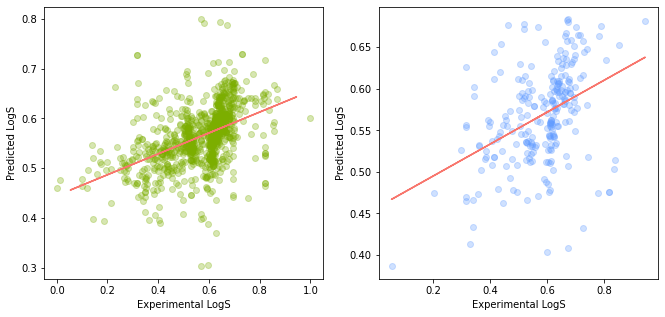

In [ ]:
plt.figure(figsize=(11,5))

# 1 row, 2 columns, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 columns, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_horizontal_logS.png')
plt.savefig('plot_horizontal_logS.pdf')

plt.show()
